# Apple Stock

# Acciones de Apple
### Introducción:

Vamos a utilizar el precio de las acciones de Apple.


### Paso 1. Importar las librerías necesarias

In [86]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser

### Paso 2. Importar el conjunto de datos de esta [dirección](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [87]:
apple = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv", sep= ",")

### Paso 3. Asignarlo a una variable apple y aplicar un head()

In [88]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Paso 4.  Comprobar el tipo de las columnas

In [89]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Paso 5. Transformar la columna Date como tipo datetime y comprobar el info()

In [90]:
apple["Date"] = pd.to_datetime(apple["Date"], dayfirst=True)
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Paso 6.  Establecer la fecha como índice

In [91]:
apple.set_index(['Date'], inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Paso 7.  ¿Hay fechas duplicadas?

In [92]:
apple.duplicated()

Date
2014-07-08    False
2014-07-07    False
2014-07-03    False
2014-07-02    False
2014-07-01    False
              ...  
1980-12-18    False
1980-12-17    False
1980-12-16    False
1980-12-15    False
1980-12-12    False
Length: 8465, dtype: bool

In [93]:
apple.equals(apple)

True

In [94]:
apple[apple.index.duplicated(keep=False)]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


### Paso 8.  Ops... parece que el índice es de la fecha más reciente. Haz que la primera entrada sea la fecha más antigua.

In [95]:
apple.sort_index(ascending=True)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Paso 9. Obtener el último día laborable de cada mes

In [96]:
apple.asfreq("BM")

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600.0,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200.0,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400.0,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400.0,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800.0,0.44
...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200.0,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300.0,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200.0,83.83


### Paso 10.  Cuál es la diferencia en días entre el primer día y el más antiguo

In [118]:
ejer_10 = (apple.index[0] - apple.index[-1]).days
print(ejer_10)

12261


### Paso 11.  ¿Cuántos meses tenemos en los datos?

In [100]:
apple["Month"] = pd.DatetimeIndex(apple.index).month

,Open,High,Low,Close,Volume,Adj Close,Month
Date,,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,7
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,7
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,7
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,7
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,7
...,...,...,...,...,...,...,...
1981-01-05,33.87,33.87,33.75,33.75,8932000,0.53,1
1981-01-02,34.50,34.75,34.50,34.50,5415200,0.54,1
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53,12


In [103]:
apple.Month

Date
2014-07-08     7
2014-07-07     7
2014-07-03     7
2014-07-02     7
2014-07-01     7
              ..
1980-12-18    12
1980-12-17    12
1980-12-16    12
1980-12-15    12
1980-12-12    12
Name: Month, Length: 8465, dtype: int64

### Paso 12. Pinta el valor 'Adj Close'. Establezca el tamaño de la figura en 13,5 x 9 pulgadas

<AxesSubplot:xlabel='Date'>

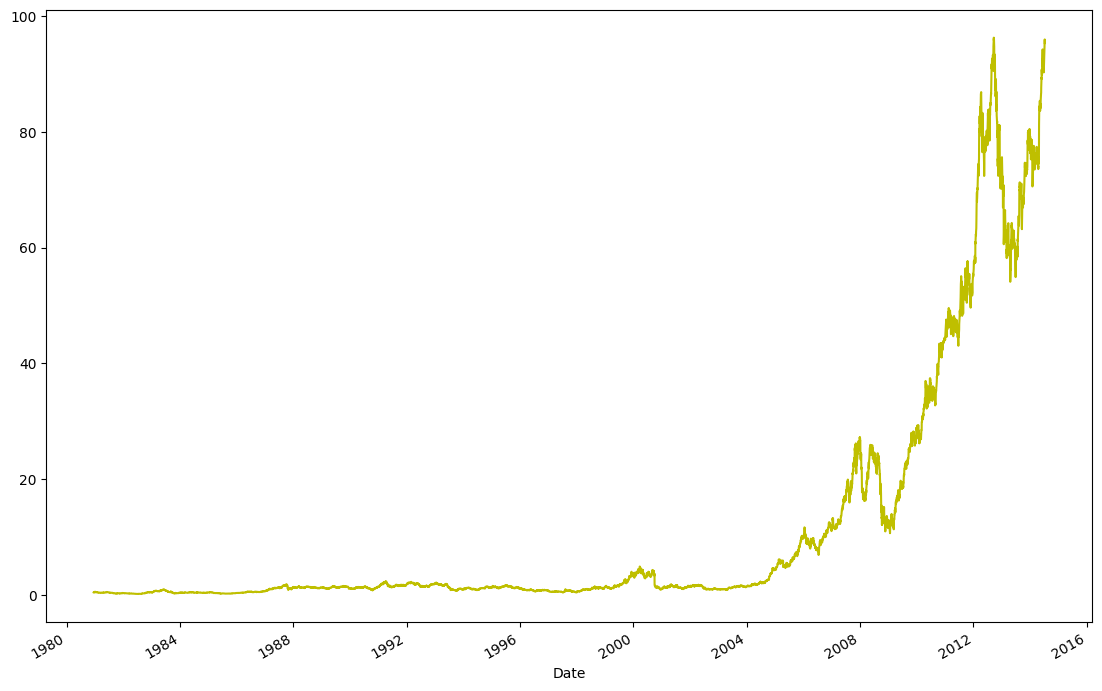

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13.5,9))
apple['Adj Close'].plot(alpha=1, style='-', c= "y")


### BONUS: Crea tu propia pregunta y respóndela.

<AxesSubplot:xlabel='Date'>

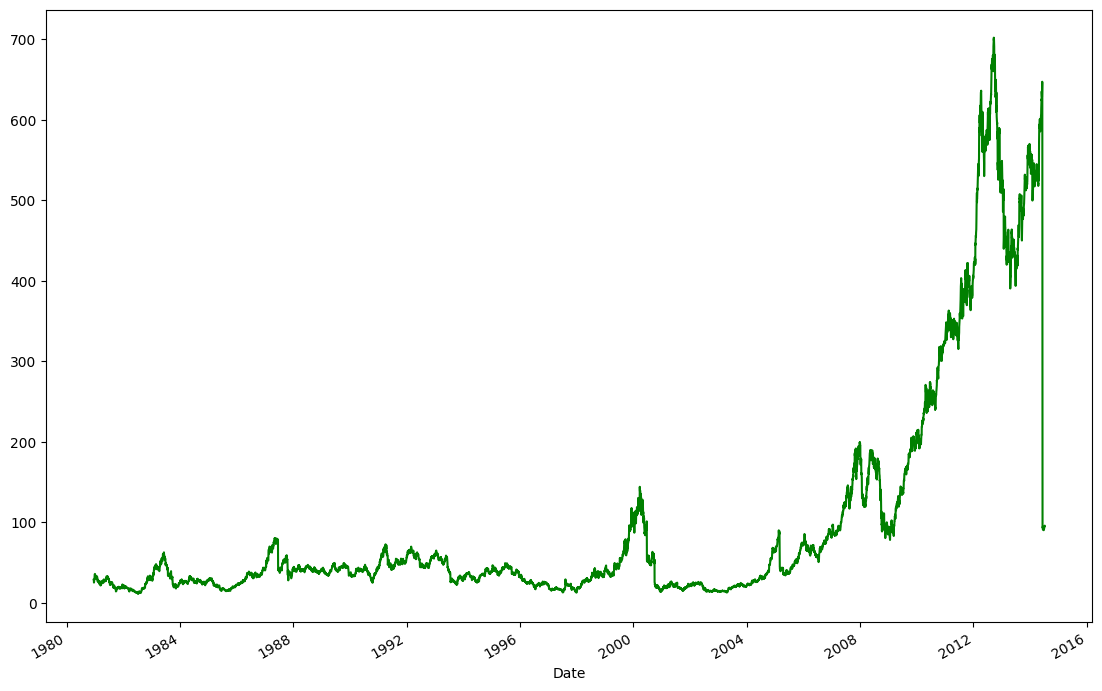

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13.5,9))
apple['Close'].plot(alpha=1, style='-', c= "g")